### Import Library and Dataset

In [1]:
import pandas as pd
df = pd.read_csv('HousingBoston.csv')
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


### Data Rescaling

In [3]:
from sklearn import preprocessing

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(df[['RM','LSTAT','PTRATIO','MEDV']])

# getting dependent and independent variables
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

### Checking the shape

In [4]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (489, 3)
Shape of y: (489,)


### Splitting the data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_train.shape)

Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (342,)


### Make the model

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg = reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)

rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

Mean squared error of testing set: 0.009971445617917922
Mean absolute error of testing set: 0.07535999511736194
Root Mean Squared Error of testing set: 0.09985712602472556


### Visualize

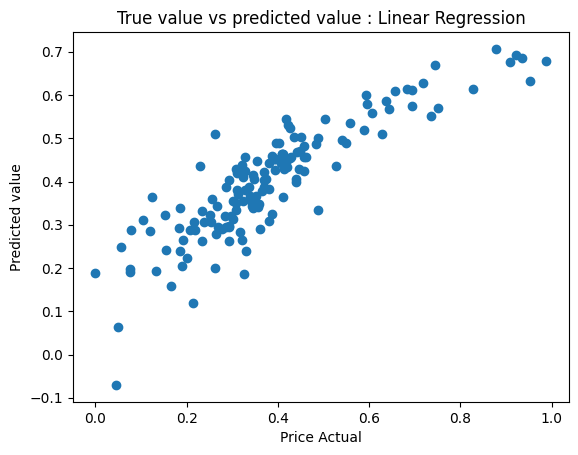

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

### Appendix

In [14]:
print('Coefficient: ', reg.coef_[0])
print('Intercept: ', reg.intercept_)

Coefficient:  0.4044700539077519
Intercept:  0.4010443583551775


### Saving Model

In [15]:
import pickle

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(reg, file)

---